In [2]:
%load_ext tensorboard
from pathlib import Path
run_dir = Path('/Users/nmorton/PycharmProjects/Summaries/2025-03-04/run1')

In [2]:

from tem import parameters

params = parameters.parameters()
params

{'has_static_action': True,
 'n_actions': 4,
 'explore_bias': 2,
 'shiny_rate': 0,
 'shiny_gamma': 0.7,
 'shiny_beta': 1.5,
 'shiny_n': 2,
 'shiny_returns': 15,
 'shiny': {'gamma': 0.7, 'beta': 1.5, 'n': 2, 'returns': 15},
 'train_it': 20000,
 'n_rollout': 20,
 'batch_size': 16,
 'walk_it_min': 25,
 'walk_it_max': 300,
 'walk_it_window': 55.0,
 'loss_weights_x': 1,
 'loss_weights_p': 1,
 'loss_weights_g': 1,
 'loss_weights_reg_g': 0.01,
 'loss_weights_reg_p': 0.02,
 'loss_weights': tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.0100, 0.0200]),
 'loss_weights_p_g_it': 2000,
 'loss_weights_reg_p_it': 4000,
 'loss_weights_reg_g_it': 40000000,
 'eta_it': 16000,
 'lambda_it': 200,
 'p2g_scale_offset': 0,
 'p2g_sig_val': 10000,
 'p2g_sig_half_it': 400,
 'p2g_sig_scale_it': 200,
 'lr_max': 0.00094,
 'lr_min': 8e-05,
 'lr_decay_rate': 0.5,
 'lr_decay_steps': 4000,
 'do_sample': False,
 'use_p_inf': True,
 'separate_ovc': False,
 'g_init_std': 0.5,
 'g_mem_std': 0.1,
 'd_hidden_dim':

In [3]:
%tensorboard --logdir /Users/nmorton/PycharmProjects/Summaries/2025-03-05/run1/train

Reusing TensorBoard on port 6007 (pid 72041), started 33 days, 4:31:23 ago. (Use '!kill 72041' to kill it.)

In [6]:
import polars as pl
import seaborn as sns
df = pl.read_csv("../csv.csv")
df

Wall time,Step,Value
f64,i64,f64
1.7412e9,50,12.8125
1.7412e9,60,11.25
1.7412e9,100,27.8125
1.7412e9,110,21.5625
1.7412e9,130,27.8125
…,…,…
1.7413e9,19820,100.0
1.7413e9,19830,98.125
1.7413e9,19950,100.0


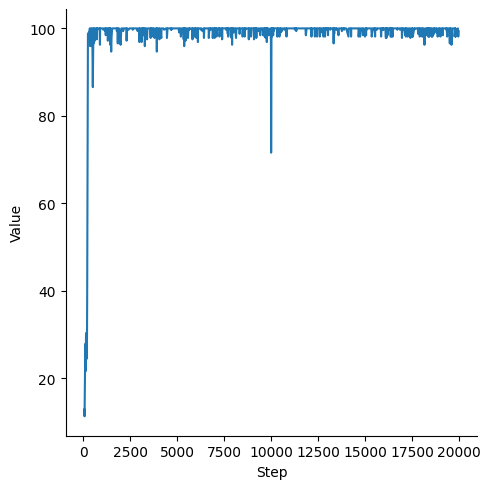

In [8]:
sns.relplot(df, x="Step", y="Value", kind="line");

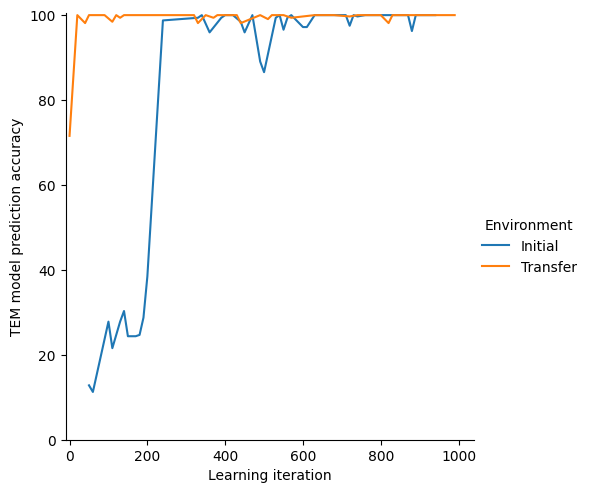

In [26]:
init = 0
tran = 10000
offset = 1000
early = df.filter(
    pl.col("Step").is_between(init, init + offset) | pl.col("Step").is_between(tran, tran + offset)
).with_columns(
    Lag=pl.when(pl.col("Step") < tran).then(pl.col("Step")).otherwise(pl.col("Step") - tran),
    Environment=pl.when(pl.col("Step") < tran).then(pl.lit("Initial")).otherwise(pl.lit("Transfer")),
)
(
    sns.relplot(early, x="Lag", y="Value", hue="Environment", kind="line")
    .set_axis_labels("Learning iteration", "TEM model prediction accuracy")
    .set(ylim=(0, 100.5), xlim=(-10, None))
    .savefig("training_transfer.pdf")
)

In [24]:
df.filter(
    pl.col("Step").is_between(init, init + offset)
)

Wall time,Step,Value
f64,i64,f64
1.7412e9,50,12.8125
1.7412e9,60,11.25
1.7412e9,100,27.8125
1.7412e9,110,21.5625
1.7412e9,130,27.8125
…,…,…
1.7412e9,860,100.0
1.7412e9,870,100.0
1.7412e9,880,96.25
